In [3]:
import pandas as pd
import gzip
import shutil
import os
import csv
import linecache
from shutil import copyfile
import ipywidgets as widgets
import numpy as np

In [8]:
with gzip.open('no_retweets_v2.tsv.gz', 'rb') as f_in:
    with open('no_retweets_set.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [10]:
save_path = '/projects/p31499/tracking_pasc/data'
file_name = "no_retweets_set_filtered.tsv"

completeName = os.path.join(save_path, file_name)

filtered_language = "en"

filtered_tw = list()
current_line = 1
with open("no_retweets_set.tsv") as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter="\t")

    if current_line == 1:
        filtered_tw.append(linecache.getline("no_retweets_set.tsv", current_line))

        for line in tsvreader:
            if line[3] == filtered_language:
                filtered_tw.append(linecache.getline("no_retweets_set.tsv", current_line))
            current_line += 1

print('\033[1mShowing first 5 tweets from the filtered dataset\033[0m')
print(filtered_tw[1:(6 if len(filtered_tw) > 6 else len(filtered_tw))])

with open(completeName, 'w') as f_output:
    for item in filtered_tw:
        f_output.write(item)

Showing first 5 tweets from the filtered dataset
['1213330173736738817\t2020-01-04\t05:23:50\ten\tNULL\n', '1214195710301618178\t2020-01-06\t14:43:10\ten\tNULL\n', '1214198629553950721\t2020-01-06\t14:54:46\ten\tNULL\n', '1214917256414662656\t2020-01-08\t14:30:20\ten\tNULL\n', '1214936881563082752\t2020-01-08\t15:48:19\ten\tNULL\n']


In [11]:
len(filtered_tw)

190561815

In [14]:
tweets = pd.read_csv("no_retweets_set_filtered.tsv", delimiter = '\t')

In [15]:
tweets

,tweet_id,date,time,lang,country_place
0,1213330173736738817,2020-01-04,05:23:50,en,NaN
1,1214195710301618178,2020-01-06,14:43:10,en,NaN
2,1214198629553950721,2020-01-06,14:54:46,en,NaN
3,1214917256414662656,2020-01-08,14:30:20,en,NaN
4,1214936881563082752,2020-01-08,15:48:19,en,NaN
...,...,...,...,...,...
190561809,1540907728113004545,2022-06-26,04:00:05,en,NaN
190561810,1540907738913546241,2022-06-26,04:00:08,en,NaN
190561811,1540907755946446849,2022-06-26,04:00:12,en,NaN
190561812,1540907761227145222,2022-06-26,04:00:13,en,NaN


In [16]:
tweets.sort_values(by = 'date', ascending = True, inplace = True)
tweets

,tweet_id,date,time,lang,country_place
0,1213330173736738817,2020-01-04,05:23:50,en,NaN
1,1214195710301618178,2020-01-06,14:43:10,en,NaN
2,1214198629553950721,2020-01-06,14:54:46,en,NaN
3,1214917256414662656,2020-01-08,14:30:20,en,NaN
4,1214936881563082752,2020-01-08,15:48:19,en,NaN
...,...,...,...,...,...
190559506,1540868434140884994,2022-06-26,01:23:57,en,NaN
190559507,1540868469951954952,2022-06-26,01:24:05,en,NaN
190559508,1540868489342320641,2022-06-26,01:24:10,en,NaN
190559497,1540868354864463872,2022-06-26,01:23:38,en,NaN


In [30]:
import random

filename = "no_retweets_set_filtered.tsv"
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 120000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list

df = pd.read_csv(filename, delimiter="\t", skiprows=skip)

KeyboardInterrupt: 

In [21]:
df

,tweet_id,date,time,lang,country_place
0,1220749184489476096,2020-01-24,16:44:20,en,NaN
1,1221488900348055552,2020-01-26,17:43:42,en,NaN
2,1221828612443267074,2020-01-27,16:13:36,en,NaN
3,1221829107194814465,2020-01-27,16:15:34,en,NaN
4,1221835146652876800,2020-01-27,16:39:34,en,NaN
...,...,...,...,...,...
119995,1540761308236492800,2022-06-25,18:18:16,en,NaN
119996,1540816240112857088,2022-06-25,21:56:33,en,NaN
119997,1540844183920967684,2022-06-25,23:47:35,en,NaN
119998,1540851081936240641,2022-06-26,00:15:00,en,NaN


<AxesSubplot:xlabel='date'>

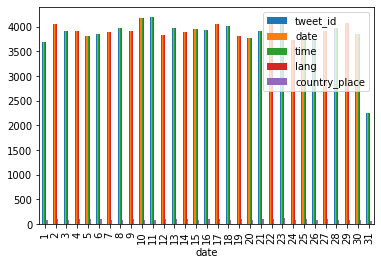

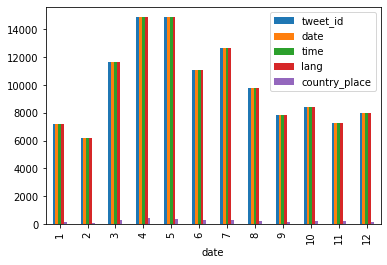

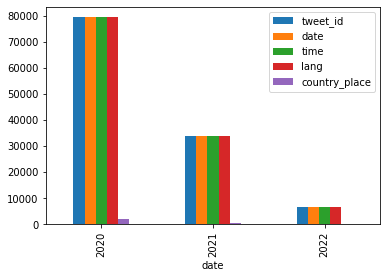

In [26]:
import matplotlib

df["date"] = df["date"].astype("datetime64")
df.groupby(df["date"].dt.day).count().plot(kind="bar")

df["date"] = df["date"].astype("datetime64")
df.groupby(df["date"].dt.month).count().plot(kind="bar")

df["date"] = df["date"].astype("datetime64")
df.groupby(df["date"].dt.year).count().plot(kind="bar")

<AxesSubplot:xlabel='date'>

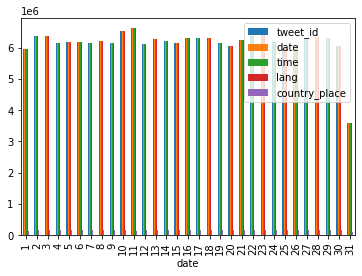

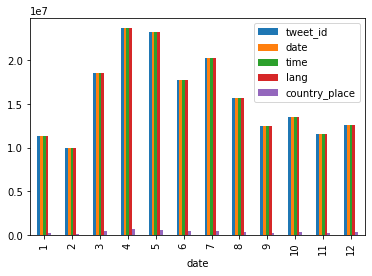

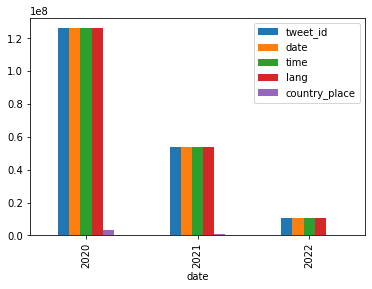

In [27]:
tweets["date"] = tweets["date"].astype("datetime64")
tweets.groupby(tweets["date"].dt.day).count().plot(kind="bar")

tweets["date"] = tweets["date"].astype("datetime64")
tweets.groupby(tweets["date"].dt.month).count().plot(kind="bar")

tweets["date"] = tweets["date"].astype("datetime64")
tweets.groupby(tweets["date"].dt.year).count().plot(kind="bar")

In [29]:
df["tweet_id"].to_csv('test.txt', index = False)

<AxesSubplot:xlabel='date,date'>

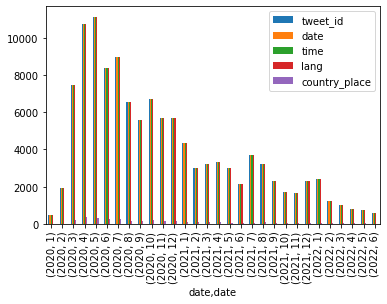

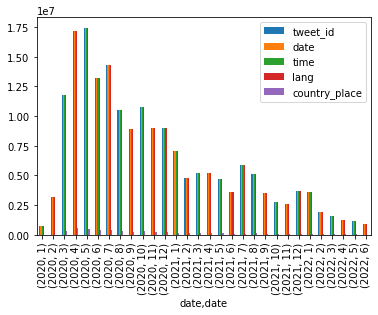

In [32]:
df.groupby([df["date"].dt.year, df["date"].dt.month]).count().plot(kind="bar")
tweets.groupby([tweets["date"].dt.year, tweets["date"].dt.month]).count().plot(kind="bar")